In [1]:
# ruff: noqa: I001
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap as LC

In [2]:
# 30 pairs of training data {x_i, y_i} to be used to fit the Gabor model
_data = np.array(
    [
        [
            -1.920e00,
            -1.422e01,
            1.490e00,
            -1.940e00,
            -2.389e00,
            -5.090e00,
            -8.861e00,
            3.578e00,
            -6.010e00,
            -6.995e00,
            3.634e00,
            8.743e-01,
            -1.096e01,
            4.073e-01,
            -9.467e00,
            8.560e00,
            1.062e01,
            -1.729e-01,
            1.040e01,
            -1.261e01,
            1.574e-01,
            -1.304e01,
            -2.156e00,
            -1.210e01,
            -1.119e01,
            2.902e00,
            -8.220e00,
            -1.179e01,
            -8.391e00,
            -4.505e00,
        ],
        [
            -1.051e00,
            -2.482e-02,
            8.896e-01,
            -4.943e-01,
            -9.371e-01,
            4.306e-01,
            9.577e-03,
            -7.944e-02,
            1.624e-01,
            -2.682e-01,
            -3.129e-01,
            8.303e-01,
            -2.365e-02,
            5.098e-01,
            -2.777e-01,
            3.367e-01,
            1.927e-01,
            -2.222e-01,
            6.352e-02,
            6.888e-03,
            3.224e-02,
            1.091e-02,
            -5.706e-01,
            -5.258e-02,
            -3.666e-02,
            1.709e-01,
            -4.805e-02,
            2.008e-01,
            -1.904e-01,
            5.952e-01,
        ],
    ]
)


In [3]:
# Definition of the Gabor model
def model(phi, x):
    sin_component = np.sin(phi[0] + 0.06*phi[1]*x)
    gauss_component = np.exp(-(phi[0] + 0.06*phi[1]*x)*(phi[0] + 0.06*phi[1]*x)/32)
    # y_pred = sin_component*gauss_component
    return sin_component*gauss_component

In [4]:
# model drawn
def draw_model(_data, model, phi, title = None):
    _x = np.arange(-15, 15, 0.1)
    _y = model(phi, _x)

    fig, ax = plt.subplots()
    ax.plot(_data[0, :], _data[1, :], 'bo')
    ax.plot(_x, _y, 'm-')
    ax.set_xlim([-15, 15])
    ax.set_ylim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title is not None:
        ax.set_title(title)
    plt.show()

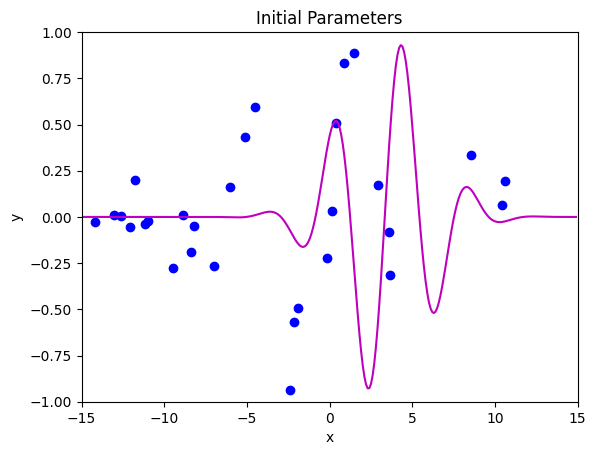

In [5]:
# init params and draw the model
phi = np.zeros((2, 1))
phi[0] = -5     # horizontal offset
phi[1] = 25     # frequency
draw_model(_data, model, phi, "Initial Parameters")

<center> Computing the sum of squares loss for the training data</center>

In [6]:
def compute_loss(_datax, _datay, model, phi):
    pred_y = model(phi, _datax)
    # loss = np.sum((pred_y - _datay)*(pred_y - _datay))
    # loss = np.sum((pred_y - _datay)**2)
    return np.sum((pred_y - _datay)*(pred_y - _datay))

In [7]:
# plot the entire loss function
color_map_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
color_map_vals_dec = np.array([int(element, base=16) for element in color_map_vals_hex])
r = np.floor(color_map_vals_dec / (256**2))
g = np.floor((color_map_vals_dec - r*256**2)/256)
b = np.floor(color_map_vals_dec - r*256**2 - g*256)
my_colormap = LC(np.vstack((r, g, b)).transpose() / 255.0)


def _loss_func(compute_loss, _data, model, my_colormap, phi_iters = None):

    # this will create a grid of offset/frequency values to plot
    offset_mesh, freqs_mesh = np.meshgrid(np.arange(-10., 10., 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)

    # computing a loss for every set of parameters given
    for id_slope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[id_slope] = compute_loss(_data[0, :], _data[1, :], model, np.array([[offset_mesh[id_slope]], [slope]]))

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(offset_mesh, freqs_mesh, loss_mesh, 256, cmap = my_colormap)
    ax.contour(offset_mesh, freqs_mesh, loss_mesh, 20, colors = ['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0, :], phi_iters[1, :], 'go-')
    ax.set_xlabel(f"Offset, ϕ₀")
    ax.set_ylabel(f"Frequency, ϕ₁")
    ax.set_ylim([2.5, 22.5])
    plt.show()




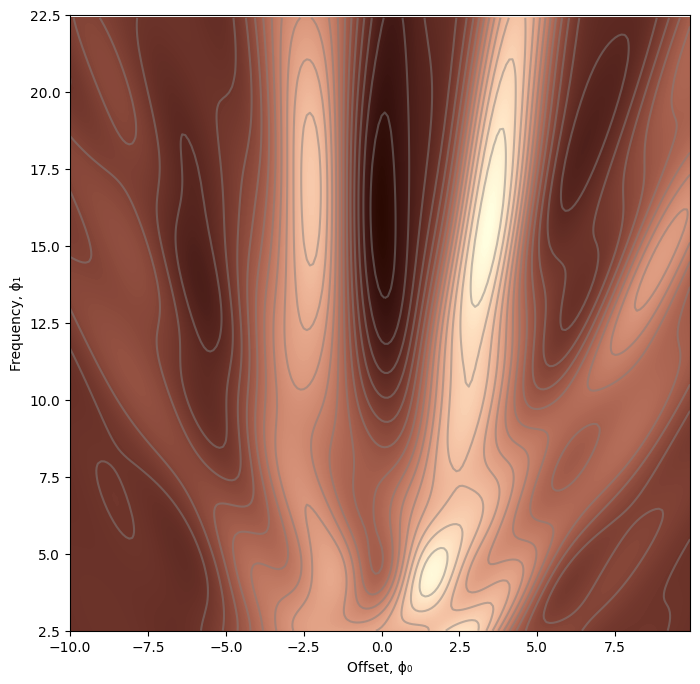

In [8]:
_loss_func(compute_loss, _data, model, my_colormap)

<center>Now compute the gradient vector for a given set of parameters</center> 

$$
\frac{\partial L}{\partial \phi} = \begin{bmatrix} \frac{\partial L}{\partial \phi_0} \\ \frac{\partial L}{\partial \phi_1} \end{bmatrix}
$$

In [9]:
# Writing out the expression for the sum of squares loss and taking the derivative wrt phi0 & phi1.

def gabor_deriv_phi0(_datax, _datay, phi0, phi1):
    _x = 0.06*phi1*_datax + phi0
    _y = _datay
    cos_component, sin_component, gaus_component = np.cos(_x), np.sin(_x), np.exp(-0.5*_x**2 / 16)
    _ddx = cos_component*gaus_component - sin_component*gaus_component*_x / 16
    return np.sum(2*_ddx * (sin_component*gaus_component - _y))


def gabor_deriv_phi1(_datax, _datay, phi0, phi1):
    _x = 0.06*phi1*_datax + phi0
    _y = _datay
    cos_component, sin_component, gaus_component = np.cos(_x), np.sin(_x), np.exp(-0.5*_x**2 / 16)
    _ddx = 0.06*_datax*cos_component*gaus_component - 0.06*_datax*sin_component*gaus_component*_x/16
    return np.sum(2*_ddx * (sin_component*gaus_component - _y))


def comp_gradient(_datax, _datay, phi):
    dl_phi0 = gabor_deriv_phi0(_datax, _datay, phi[0], phi[1])
    dl_phi1 = gabor_deriv_phi1(_datax, _datay, phi[0], phi[1])
    return np.array([[dl_phi0], [dl_phi1]])

In [10]:
def gradient_descent_step(phi, _data, models):
    # step 1: compute the gradient
    gradient = comp_gradient(_data[0, :], _data[1, :], phi)
    # 2: update the params -- NOTE: we want to search in the negative (downhill) direction
    alpha = 0.1
    return phi - alpha*gradient

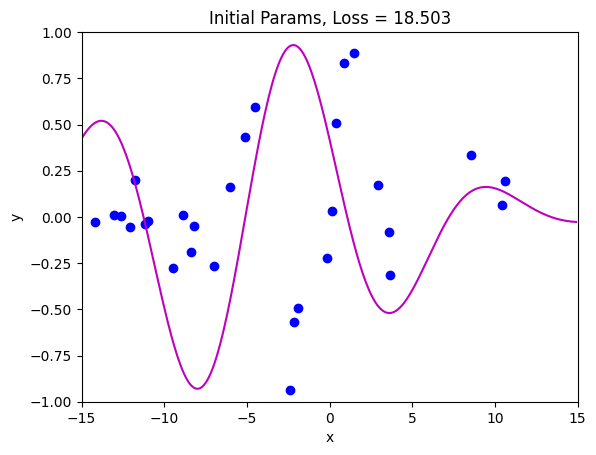

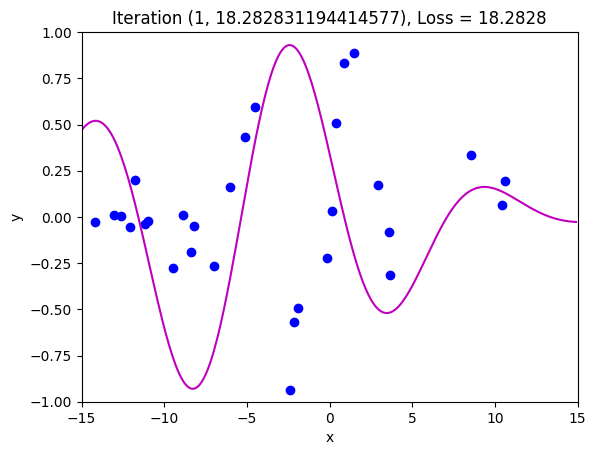

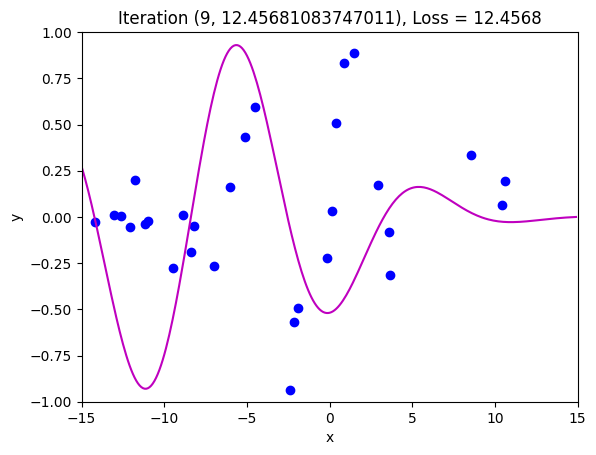

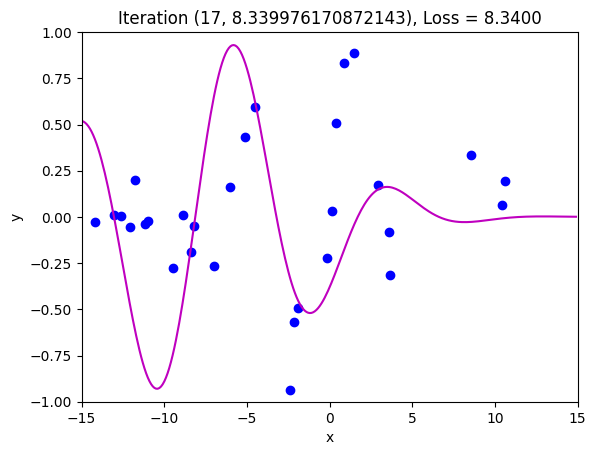

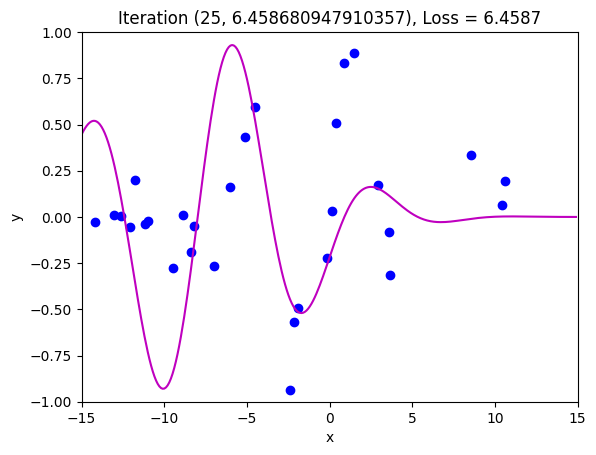

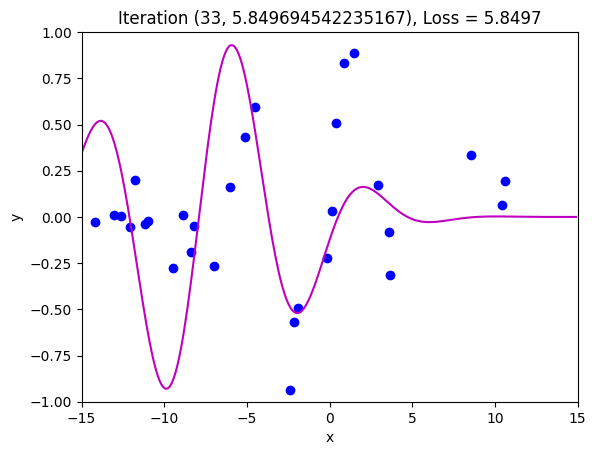

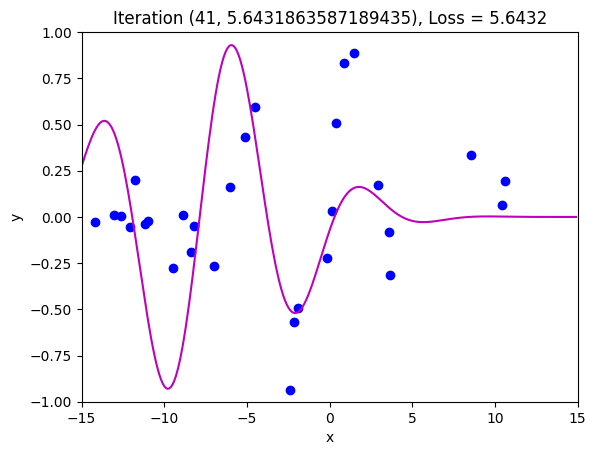

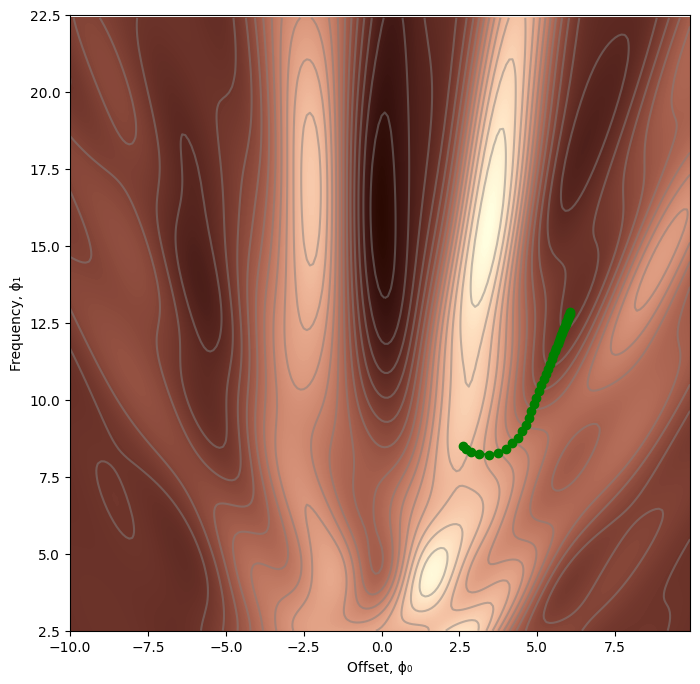

In [11]:
# init the params
_nsteps = 41
phi_all = np.zeros((2, _nsteps + 1))
phi_all[0, 0] = 2.6
phi_all[1, 0] = 8.5

# measure the loss and draw the initial model
loss = compute_loss(_data[0, :], _data[1, :], model, phi_all[:, 0:1])
draw_model(_data, model, phi_all[:, 0:1], f"Initial Params, Loss = {loss:.3f}")

for c_step in range(_nsteps):
    # do gradient descent step
    phi_all[:, c_step + 1: c_step + 2] = gradient_descent_step(phi_all[:, c_step:c_step + 1], _data, model)
    # measure loss and draw model for every 8th step
    if c_step % 8 == 0:
        loss = compute_loss(_data[0, :], _data[1, :], model, phi_all[:, c_step + 1:c_step + 2])
        draw_model(_data, model, phi_all[:, c_step + 1], f"Iteration {c_step + 1, loss}, Loss = {loss:.4f}")

_loss_func(compute_loss, _data, model, my_colormap, phi_all)


Unfortunately, when we start from this position, the solution descends to a local minimum and the final model doesnt fit very well.

What if we had some weak knowledge that the solution was in the vicinity of $\phi_0 = 0.0, \phi_1 = 12.5$ (center of the plot)?
Lets add the term to the loss function that penalizes solutions that deviate from this point.
$$
L‵[\phi] = L[\phi] + \lambda \cdot (\phi^{2}_0 + (\phi_1 - 12.5)^{2})
$$

<center>Where λ controls the relative importance of the original loss and the regularization term.</center>

In [12]:
# compute the regularization term
def compute_reg_term(phi0, phi1):
    # TODO compute the regularization term (term in large brackets in the above equation) -- replace this line
    # reg_term = 0.0
    return 0.0


# Define the loss function
def compute_loss2(_datax, _datay, model, phi, _lambda):
    pred_y = model(phi, _datax)
    # loss = np.sum((pred_y - _datay)*(pred_y - _datay))
    # # and the new term to the Loss
    # loss = loss + _lambda*compute_reg_term(phi[0], phi[1])
    # return loss
    return np.sum((pred_y - _datay)**2) + _lambda*compute_reg_term(phi[0], phi[1])


In [13]:
# code to draw the regularization function

def draw_reg_function():

    # Make grid of offset/frequency values to plot
    offset_mesh, freqs_mesh = np.meshgrid(np.arange(-10., 10., 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)

    # computing a loss for every set of parameters given
    for id_slope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[id_slope] = compute_reg_term(offset_mesh[id_slope], slope)

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(offset_mesh, freqs_mesh, loss_mesh, 256, cmap = my_colormap)
    ax.contour(offset_mesh, freqs_mesh, loss_mesh, 20, colors = ['#80808080'])
    ax.set_xlabel(f"Offset, ϕ₀")
    ax.set_ylabel(f"Frequency, ϕ₁")
    ax.set_ylim([2.5, 22.5])
    plt.show()

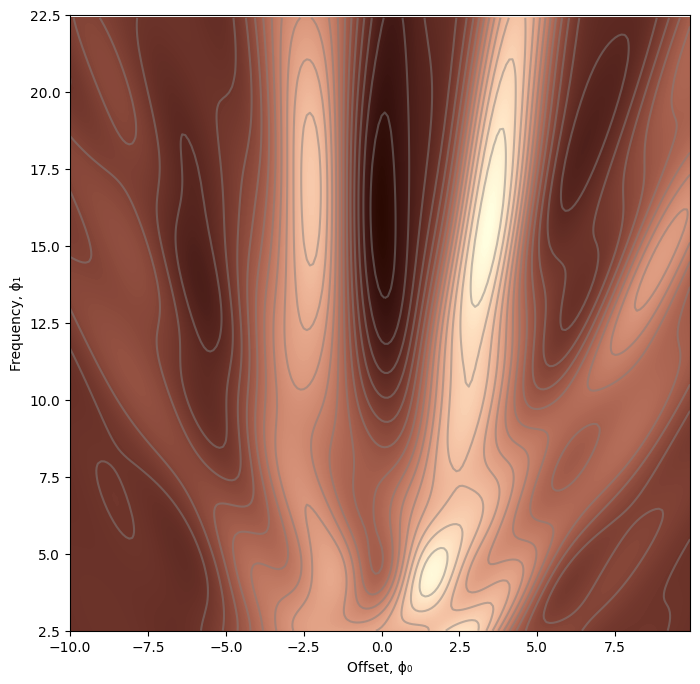

In [15]:
# draw Loss function with regularization
def draw_loss_function_reg(_data, model, _lambda, my_colormap, phi_iters = None):

    offset_mesh, freqs_mesh = np.meshgrid(np.arange(-10., 10., 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)

    # computing a loss for every set of parameters given
    for id_slope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[id_slope] = compute_loss2(_data[0, :], _data[1, :], model, np.array([[offset_mesh[id_slope]], [slope]]), _lambda)

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.contourf(offset_mesh, freqs_mesh, loss_mesh, 256, cmap = my_colormap)
    ax.contour(offset_mesh, freqs_mesh, loss_mesh, 20, colors = ['#80808080'])
    if phi_iters is not None:
        ax.plot(phi_iters[0, :], phi_iters[1, :], 'go-')
    ax.set_xlabel(f"Offset, ϕ₀")
    ax.set_ylabel(f"Frequency, ϕ₁")
    ax.set_ylim([2.5, 22.5])
    plt.show()

# this should be similar to the above
draw_loss_function_reg(_data, model, 0.2, my_colormap)


TODO - Experiment with different values of the regularization weight _lambda
- What do you predict will happen when it is very small (e.g. 0.01)?
- What do you predict will happen when it is large (e.g, 1.0)?
- What happens to the loss at the global minimum when we add the regularization term?
- Does it go up?  Go down?  Stay the same?

Now we'll compute the derivative $\frac{\partial L\prime}{\partial\phi_0}$ and $\frac{\partial L\prime}{\partial\phi_1}$ of the regularized loss function $L\prime$ with respect to the parameters $\phi_0$ and $\phi_1$.

$$
L\prime[\phi] = L[\phi] + \lambda \cdot (\phi^{2}_0 + (\phi_1 - 12.5)^{2})
$$

So that we can perform the gradient descent


In [ ]:
def dldphi0(phi, _lambda):
    # TODO compute the derivative wrt phi0
    # deriv = 0
    return 0


def dldphi1(phi, _lambda):
    # TODO compute the derivative wrt phi1
    # deriv = 0
    return 0

In [17]:
def compute_gradient2(_datax, _datay, phi, _lambda):
    dl_dphi0 = gabor_deriv_phi0(_datax, _datay, phi[0], phi[1]) + dldphi0(np.squeeze(phi), _lambda)
    dl_dphi1 = gabor_deriv_phi0(_datax, _datay, phi[0], phi[1]) + dldphi1(np.squeeze(phi), _lambda)
    return np.array([[dl_dphi0], [dl_dphi1]])


def gradient_descent_step2(phi, _lambda, _data, model):
    gradient = compute_gradient2(_data[0, :], _data[1, :], phi, _lambda)
    alpha = 0.1
    # phi = phi - alpha*gradient
    return phi - alpha*gradient

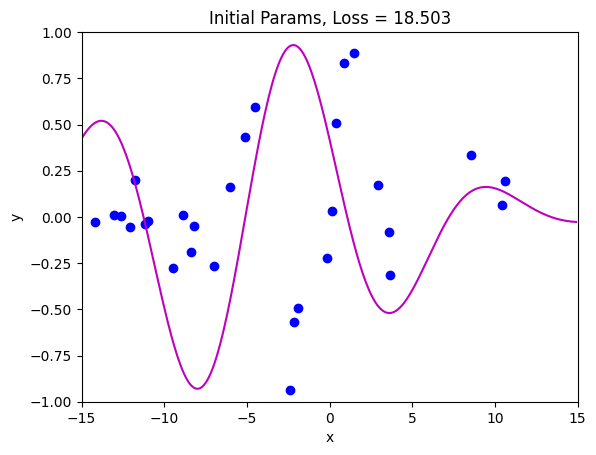

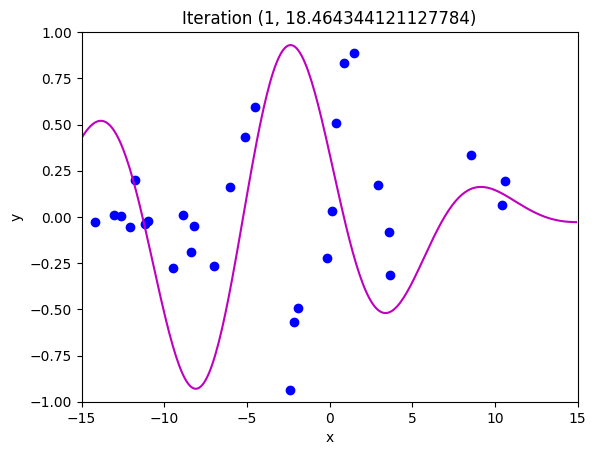

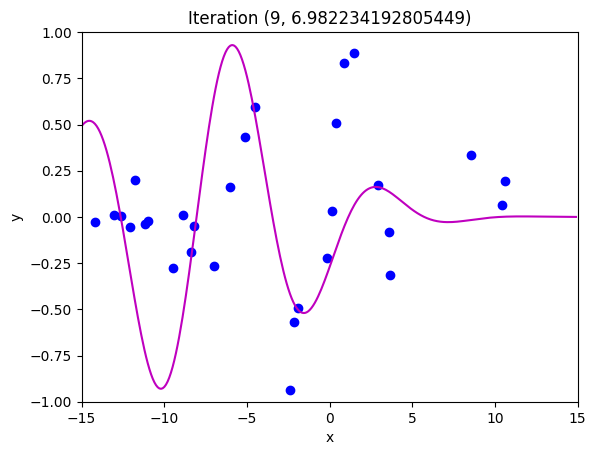

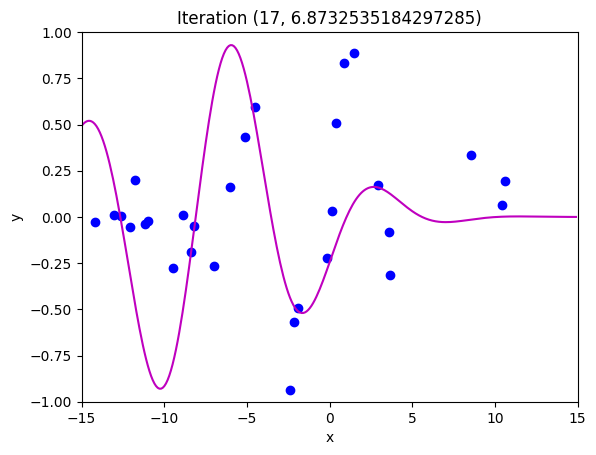

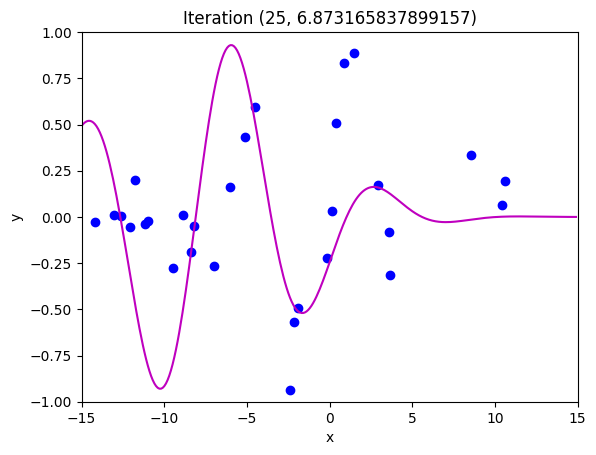

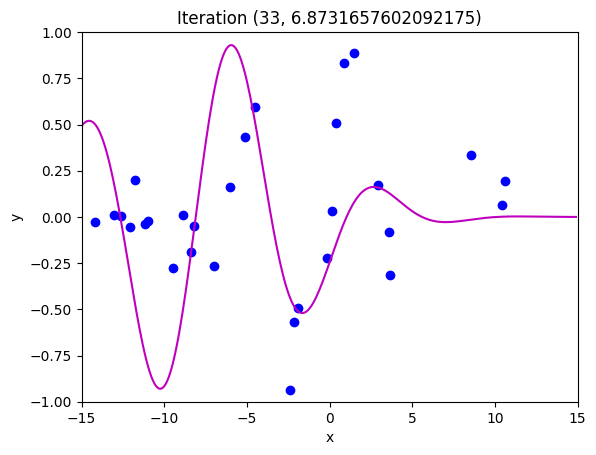

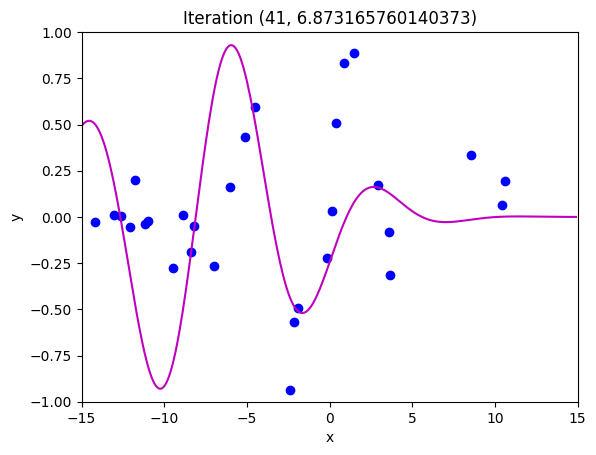

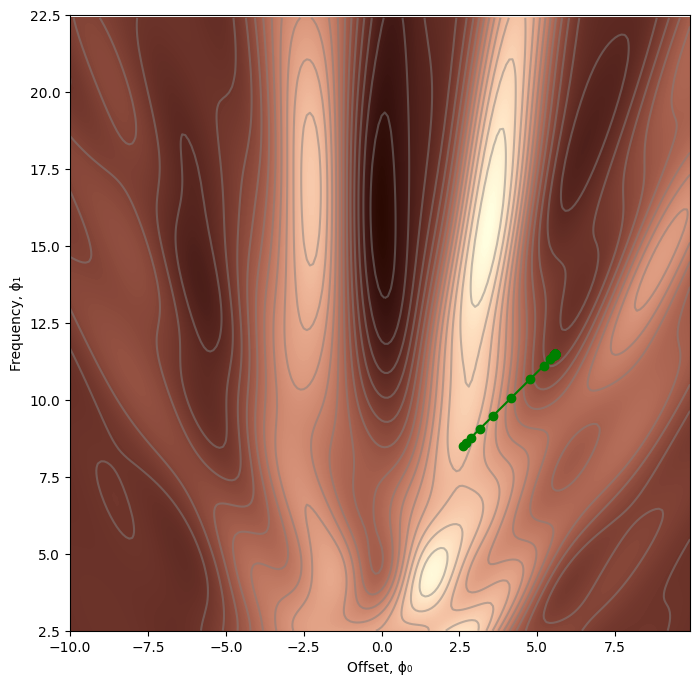

In [19]:
# finally run gradient descent and draw the results
_nsteps = 41
phi_all = np.zeros((2, _nsteps + 1))
phi_all[0, 0] = 2.6
phi_all[1, 0] = 8.5
_lambda = 0.2

# measure the loss and draw the initial model
loss = compute_loss2(_data[0, :], _data[1, :], model, phi_all[:, 0:1], _lambda)
draw_model(_data, model, phi_all[:, 0:1], f"Initial Params, Loss = {loss:.3f}")

for c_step in range(_nsteps):
    # do gradient descent step
    phi_all[:, c_step + 1: c_step + 2] = gradient_descent_step2(phi_all[:, c_step:c_step + 1], _lambda, _data, model)
    # measure loss and draw model for every 8th step
    if c_step % 8 == 0:
        loss = compute_loss2(_data[0, :], _data[1, :], model, phi_all[:, c_step + 1:c_step + 2], _lambda)
        draw_model(_data, model, phi_all[:, c_step + 1], f"Iteration {c_step + 1, loss}")

draw_loss_function_reg(_data, model, _lambda, my_colormap, phi_all)